**Course**: [BIO-341 _Systèmes Dynamiques en Biologie](https://moodle.epfl.ch/course/info.php?id=14291)

**Professor**: _Felix Naef_

# Entrainement of a phase oscillator

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib
from IPython.display import HTML
from scipy.integrate import odeint
%matplotlib notebook


<IPython.core.display.Javascript object>


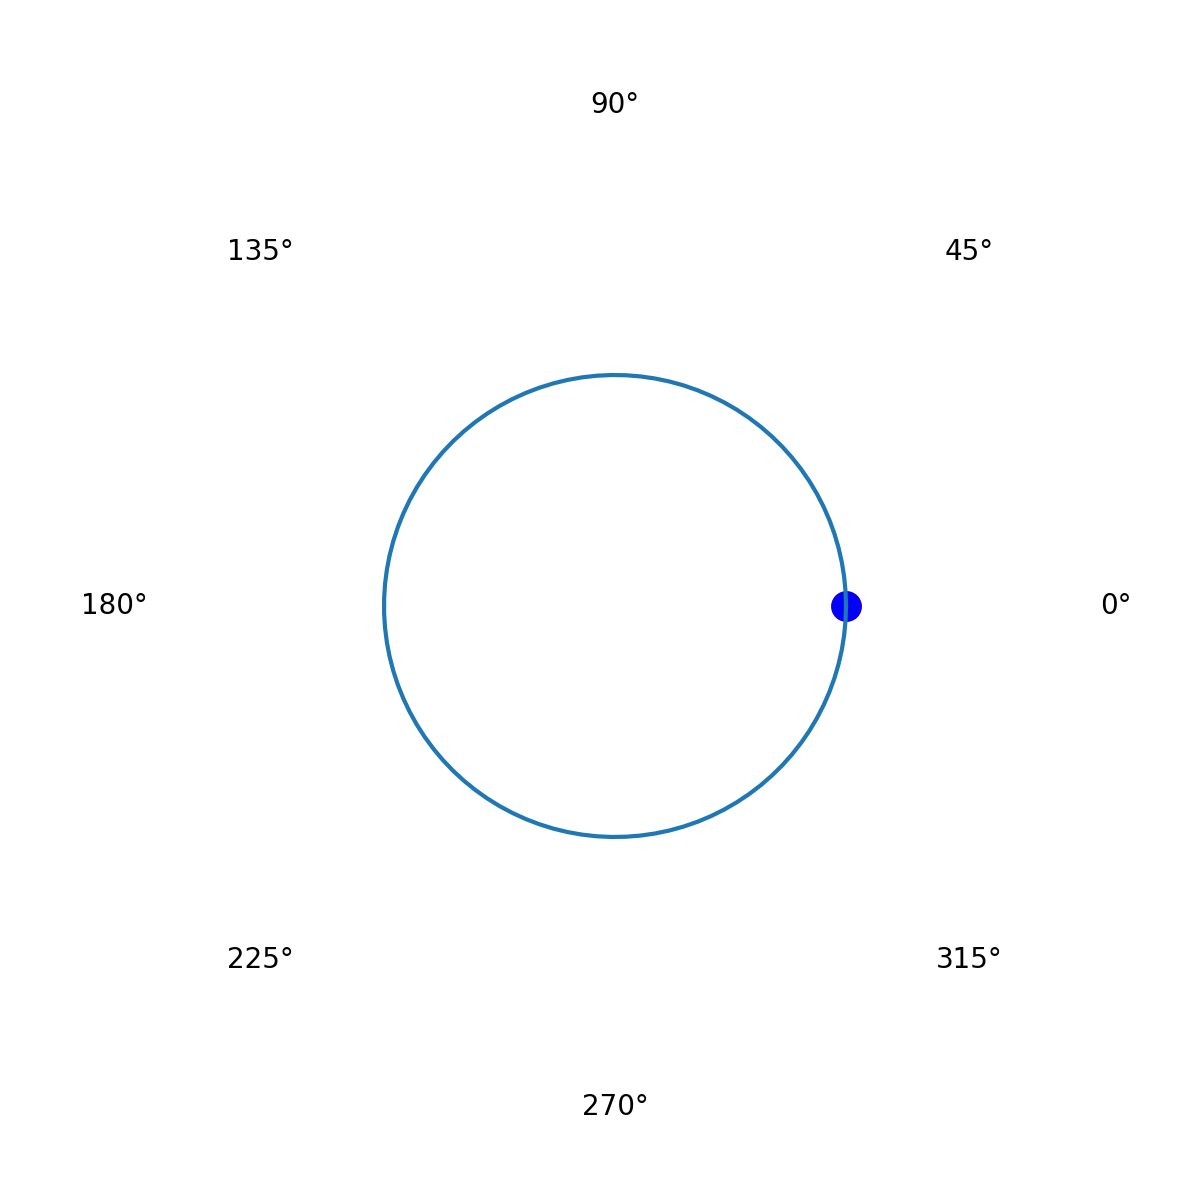

In [4]:
Nframes = 5000
K = 0
# K = np.pi*0.5
# K = np.pi*0.95
# K = np.pi*2

tspan = np.linspace(0,10,Nframes)

x0 = [0,0]
def model(x,t,K):
    theta1, theta2 = x
    theta1dot = 2*np.pi/1
    theta2dot = 2*np.pi/2 + K*np.sin(theta1-theta2)
    return theta1dot, theta2dot

X = odeint(model, x0, tspan, args=(K,))

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)

line = ax.plot(np.linspace(0,2*np.pi,100), [1]*100)
scat1 = ax.scatter([],[], color= 'red', s = 100 )
scat2 = ax.scatter([],[], color = 'blue', s= 100)


# Hide grid lines
ax.grid(False)
ax.spines['polar'].set_visible(False)

# Hide axes ticks
#ax.set_xticks([])
ax.set_yticks([])
#ax.tick_params(pad=-120)


#zoom out
#ax.set_ylim([0,5])

def update(i):
    scat1.set_offsets([X[i,0],1])
    scat2.set_offsets([X[i,1],1])
    return scat1, scat2

ani = animation.FuncAnimation(fig, update, interval = 1, frames = Nframes, repeat = False, blit=True)
#HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())


plt.show()